In [75]:
import numpy as np
import pandas as pd
from rpy2.robjects import r, numpy2ri
numpy2ri.activate()
from rpy2.robjects.packages import importr
sinkr = importr('sinkr')
import matplotlib.pyplot as plt

# Read data

In [76]:
data=pd.read_csv('v100_hr_20200101-0930_cut_utf8.csv')

In [77]:
###
#cal_PMf  
###
u=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(244, 6816)
(244, 6816)


# DINEOF (like FPCA)

In [78]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 10.42885186"


[1]
 "1 EOF ; RMS = 10.41674443"


[1]
 "1 EOF ; RMS = 10.4164298"


[1]
 "1 EOF ; RMS = 10.41637791"


[1]
 "1 EOF ; RMS = 10.41635924"


[1]
 "1 EOF ; RMS = 10.4163509"


[1]
 "2 EOF ; RMS = 9.55453795"


[1]
 "2 EOF ; RMS = 9.55381993"


[1]
 "2 EOF ; RMS = 9.55378101"


[1]
 "2 EOF ; RMS = 9.55374716"


[1]
 "2 EOF ; RMS = 9.55373374"


[1]
 "2 EOF ; RMS = 9.55372897"


[1]
 "3 EOF ; RMS = 9.29758956"


[1]
 "3 EOF ; RMS = 9.30118341"


[1]
 "4 EOF ; RMS = 9.06046429"


[1]
 "4 EOF ; RMS = 9.06262731"


[1]
 "5 EOF ; RMS = 8.8543299"


[1]
 "5 EOF ; RMS = 8.86097462"


[1]
 "6 EOF ; RMS = 8.73785573"


[1]
 "6 EOF ; RMS = 8.74252505"


[1]
 "7 EOF ; RMS = 8.60137036"


[1]
 "7 EOF ; RMS = 8.60368156"


[1]
 "8 EOF ; RMS = 8.49109826"


[1]
 "8 EOF ; RMS = 8.48901018"


[1]
 "8 EOF ; RMS = 8.49153512"


[1]
 "9 EOF ; RMS = 8.44326789"


[1]
 "9 EOF ; RMS = 8.45695016"


[1]
 "10 EOF ; RMS = 8.41182638"


[1]
 "10 EOF ; RMS = 8.43030609"


[1]
 "11 

# Restruct Function

In [79]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
XCov_fun=np.cov(XRestruct_Fun.T)
XMean_fun=np.zeros(6816)
YMean_fun=np.zeros(6816)
for i in range(0,6816):
    for j in range(0,244):
        XMean_fun[i]=XMean_fun[i]+(XRestruct_Fun[j][i]/244)
        YMean_fun[i]=YMean_fun[i]+(YRestruct_Fun[j][i]/244)
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))
print(np.shape(XCov_fun))
print(np.shape(XMean_fun))
print(np.shape(YMean_fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(244, 6816)
(244, 6816)
(6816, 6816)
(6816,)
(6816,)


In [80]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xbar=XMean_fun
Ybar=YMean_fun
print('Xhat')
#print(Xhat)
print(np.shape(Xhat))
print('Yhat')
#print(Yhat)
print(np.shape(Yhat))
print('Xbar')
#print(Xbar)
print(np.shape(Xbar))
print('Ybar')
#print(Ybar)
print(np.shape(Ybar))

Xhat
(244, 6816)
Yhat
(244, 6816)
Xbar
(6816,)
Ybar
(6816,)


# Regression

In [81]:
G_xx=XCov_fun
G_xxt=np.zeros(6816)
for i in range(0,6816):
     G_xxt[i]=G_xx[i][i]
# print(G_xxt)
print(np.shape(G_xxt))

G_xy=0
for i in range (0,244):
    G_xyi=(Xhat[i]-Xbar)*(Yhat[i]-Ybar)
    G_xy=G_xy+G_xyi
G_xy=G_xy/243
# print(G_xy)
print(np.shape(G_xy))

(6816,)
(6816,)


In [82]:
B_1=G_xy/G_xxt
B_0=YMean_fun-(B_1*XMean_fun)
B_1const=0
for i in range (0,6816):
    B_1const=B_1const+B_1[i]
B_1const=B_1const/6816
print('B_1')
#print(B_1)
print(np.shape(B_1))
print('B_0')
#print(B_0)
print(np.shape(B_0))
print('B_1const')
#print(B_1const)
print(np.shape(B_1const))

B_1
(6816,)
B_0
(6816,)
B_1const
()


# Generate Calibrating Data

In [83]:
before_fx=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    before_fx[i]=a
print(np.shape(before_fx))

(274, 6816)


In [84]:
after_fx_r=sinkr.dineof(before_fx)
after_fx=np.array(after_fx_r[0])
print(np.shape(after_fx))

[1]
 "1 EOF ; RMS = 9.93122993"


[1]
 "1 EOF ; RMS = 9.91862359"


[1]
 "1 EOF ; RMS = 9.91821868"


[1]
 "1 EOF ; RMS = 9.91817729"


[1]
 "1 EOF ; RMS = 9.91817511"


[1]
 "2 EOF ; RMS = 9.09318352"


[1]
 "2 EOF ; RMS = 9.0940107"


[1]
 "3 EOF ; RMS = 8.84504497"


[1]
 "3 EOF ; RMS = 8.84974504"


[1]
 "4 EOF ; RMS = 8.62914871"


[1]
 "4 EOF ; RMS = 8.63620119"


[1]
 "5 EOF ; RMS = 8.50857044"


[1]
 "5 EOF ; RMS = 8.5212218"


[1]
 "6 EOF ; RMS = 8.40172296"


[1]
 "6 EOF ; RMS = 8.41140099"


[1]
 "7 EOF ; RMS = 8.31100387"


[1]
 "7 EOF ; RMS = 8.31767684"


[1]
 "8 EOF ; RMS = 8.22306288"


[1]
 "8 EOF ; RMS = 8.23659932"


[1]
 "9 EOF ; RMS = 8.16921965"


[1]
 "9 EOF ; RMS = 8.18285149"


[1]
 "10 EOF ; RMS = 8.12010934"


[1]
 "10 EOF ; RMS = 8.13339361"


[1]
 "11 EOF ; RMS = 8.09893996"


[1]
 "11 EOF ; RMS = 8.11985491"


[1]
 "12 EOF ; RMS = 8.07782132"


[1]
 "12 EOF ; RMS = 8.10297011"


[1]
 "13 EOF ; RMS = 8.12647736"


(274, 6816)


In [85]:
fit_fx=B_0+(B_1*after_fx)
print(np.shape(fit_fx))
fit_fxC=B_0+(B_1const*after_fx)
print(np.shape(fit_fxC))

(274, 6816)
(274, 6816)


# Compare

In [86]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i]=a
#Delete missing data
for i in range(0,274):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit_fx))
print(np.shape(fit_fxC))

(274, 6816)
(274, 6816)
(274, 6816)
(274, 6816)


## MADE

In [87]:
#Compare January to August (training data set)
before_error1=0
after_error1=0
after_errorC1=0
for i in range (0,244):
    for j in range(0,6816):
        before_error1=before_error1+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC1=after_errorC1+abs(fit_fxC[i][j]-old_y[i][j])
before_error1=before_error1/244/6816
after_error1=after_error1/244/6816
after_errorC1=after_errorC1/244/6816
print("January to August (training data set) before_error: %f" %before_error1)
print("January to August (training data set) after_error: %f" %after_error1)
print("January to August (training data set with const B_1) after_error: %f" %after_errorC1)

January to August (training data set) before_error: 7.961740
January to August (training data set) after_error: 6.546748
January to August (training data set with const B_1) after_error: 6.899581


In [88]:
#Compare September (testing data set)
before_error2=0
after_error2=0
after_errorC2=0
for i in range (244,274):
    for j in range(0,6816):
        before_error2=before_error2+abs(old_x[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC2=after_errorC2+abs(fit_fxC[i][j]-old_y[i][j])
before_error2=before_error2/30/6816
after_error2=after_error2/30/6816
after_errorC2=after_errorC2/30/6816
print("September (testing data set) before_error: %f" %before_error2)
print("September (testing data set) after_error: %f" %after_error2)
print("September (testing data set with const B_1) after_error: %f" %after_errorC2)

September (testing data set) before_error: 7.356276
September (testing data set) after_error: 5.728406
September (testing data set with const B_1) after_error: 5.925852


MADE with days (9/1~9/30)

In [89]:
days_before_error=np.zeros(30)
days_after_error=np.zeros(30)
days_after_errorC=np.zeros(30)
error1=0
error2=0
error3=0
for i in range (244,274):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
        error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    days_before_error[i-244]=error1/6816
    days_after_error[i-244]=error2/6816
    days_after_errorC[i-244]=error3/6816
    error1=0
    error2=0
    error3=0

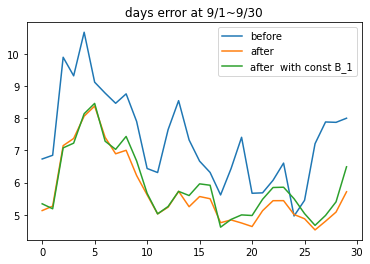

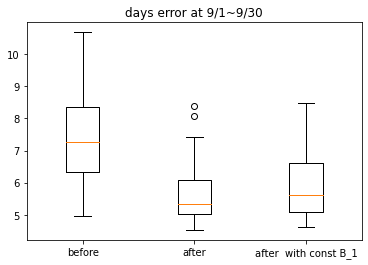

In [90]:
fig1 = plt.figure(1)
plt.plot(days_before_error, label = 'before')
plt.plot(days_after_error, label ='after')
plt.plot(days_after_errorC, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('days error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([days_before_error,days_after_error,days_after_errorC], labels=('before','after','after  with const B_1'))
plt.title("days error at 9/1~9/30")

plt.show()